Imports

In [4]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Get the data.

The data is from https://keras.io/api/datasets/cifar10/.
It is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

In [5]:
dataset = keras.datasets.cifar10

Load and process the data

In [6]:
(training_images, training_labels), (test_images, test_labels) = dataset.load_data()

training_images = training_images.reshape(50000, 32, 32, 3)
test_images = test_images.reshape(10000, 32, 32, 3)

Data distribution

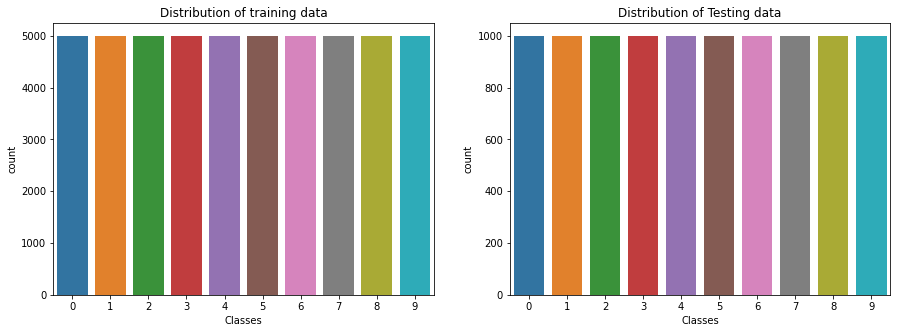

In [7]:
fig1, axs = plt.subplots(1,2,figsize=(15,5))
# Count plot for training set
sns.countplot(training_labels.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(test_labels.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

Creating the model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=training_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10)) # There are 10 classes
model.add(Activation('softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

Model summary

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

Data augmentation

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                                                       width_shift_range=0.3,
                                                       height_shift_range=0.3,
                                                       shear_range=0.2,
                                                       fill_mode='nearest',
                                                       horizontal_flip=True)

datagen.fit(training_images)

Fitting the model using 60 epochs

In [ ]:
epochs = 60
batch_size = 32

history = model.fit_generator(datagen.flow(training_images, training_labels, batch_size=batch_size), validation_data=(test_images, test_labels), epochs=epochs, workers=4, shuffle=True)

Epoch 1/60
1563/1563 [==============================] - 86s 55ms/step - loss: 2.0261 - val_loss: 1.7180

Evaluate the data

In [ ]:
scores = model.evaluate(test_images, test_labels)

print('Test loss: ', scores)

Show history of the training

In [ ]:
fig2, axs = plt.subplots(1,2,figsize=(15,5))
# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'validate'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'validate'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(test_images)


labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

Y_pred_classes = np.argmax(pred, axis=1)
Y_true = np.argmax(training_labels, axis=1)

for i in np.arange(0, R*C):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
